In [475]:
import pandas as pd
df=pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [476]:
from scipy.stats import zscore
import numpy as np

numeric_cols = df.select_dtypes(include=np.number)

z_scores = np.abs(zscore(numeric_cols))

df_no_outliers = df[(z_scores < 3).all(axis=1)]


In [477]:
df_no_outliers

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
13,9240000,3500,4,2,2,yes,no,no,yes,no,2,no,furnished
14,9240000,7800,3,2,2,yes,no,no,no,no,0,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [478]:
df_no_outliers.select_dtypes(include=['object', 'category']).columns


Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [479]:
cat_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus']


In [480]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
     df_no_outliers[col] = le.fit_transform(df_no_outliers[col])


/tmp/ipython-input-480-1501622112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = le.fit_transform(df_no_outliers[col])
/tmp/ipython-input-480-1501622112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[col] = le.fit_transform(df_no_outliers[col])
/tmp/ipython-input-480-1501622112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [481]:
df_no_outliers['price_per_sqft'] = df_no_outliers['price'] / df_no_outliers['area']


/tmp/ipython-input-481-1476359551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['price_per_sqft'] = df_no_outliers['price'] / df_no_outliers['area']


In [482]:
df_no_outliers['total_rooms'] = df_no_outliers['bedrooms'] + df_no_outliers['bathrooms']
df_no_outliers['area_per_room'] = df_no_outliers['area'] / df_no_outliers['total_rooms']
df_no_outliers['has_luxury_features'] = (
    df_no_outliers['airconditioning'] +
    df_no_outliers['prefarea'] +
    df_no_outliers['hotwaterheating']
)


/tmp/ipython-input-482-2480666723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['total_rooms'] = df_no_outliers['bedrooms'] + df_no_outliers['bathrooms']
/tmp/ipython-input-482-2480666723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['area_per_room'] = df_no_outliers['area'] / df_no_outliers['total_rooms']
/tmp/ipython-input-482-2480666723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [483]:
df_no_outliers = df_no_outliers.drop(['mainroad', 'hotwaterheating', 'airconditioning','bedrooms','guestroom'], axis=1)

In [484]:
df_no_outliers

,price,area,bathrooms,stories,basement,parking,prefarea,furnishingstatus,price_per_sqft,total_rooms,area_per_room,has_luxury_features
8,9870000,8100,1,2,1,2,1,0,1218.518519,5,1620.000000,2
9,9800000,5750,2,4,0,1,1,2,1704.347826,5,1150.000000,2
12,9310000,6550,2,2,0,1,1,1,1421.374046,6,1091.666667,2
13,9240000,3500,2,2,0,2,0,0,2640.000000,6,583.333333,1
14,9240000,7800,2,2,0,0,1,1,1184.615385,5,1560.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,1,1,2,0,2,606.666667,3,1000.000000,0
541,1767150,2400,1,1,0,0,0,1,736.312500,4,600.000000,0
542,1750000,3620,1,1,0,0,0,2,483.425414,3,1206.666667,0
543,1750000,2910,1,1,0,0,0,0,601.374570,4,727.500000,0


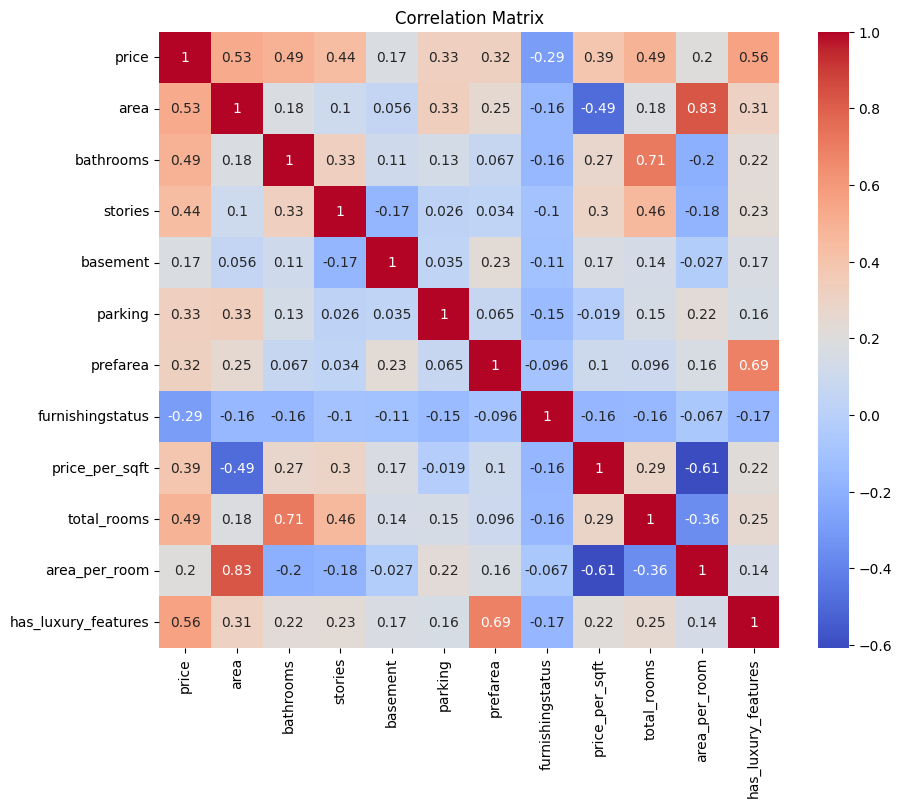

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [486]:
from sklearn.model_selection import train_test_split

X = df_no_outliers.drop('price', axis=1)  # or your actual target column name
y = df_no_outliers['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [487]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

models = {
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    print(f"{name}:")
    print(f"  Training R2: {train_r2:.4f}")
    print(f"  Testing R2: {test_r2:.4f}")
    print(f"  Training MAE: {train_mae:.2f}")
    print(f"  Testing MAE: {test_mae:.2f}")
    print(f"  Training MSE: {train_mse:.2f}")
    print(f"  Testing MSE: {test_mse:.2f}")
    print("-" * 50)


Decision Tree Regression:
  Training R2: 1.0000
  Testing R2: 0.9143
  Training MAE: 0.00
  Testing MAE: 392705.33
  Training MSE: 0.00
  Testing MSE: 313451245986.67
--------------------------------------------------
Gradient Boosting Regression:
  Training R2: 0.9951
  Testing R2: 0.9659
  Training MAE: 84733.96
  Testing MAE: 253515.32
  Training MSE: 12338017212.26
  Testing MSE: 124580069910.33
--------------------------------------------------


In [488]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


base_models = [
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42))
]

final_model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=4)

stack_model = StackingRegressor(estimators=base_models, final_estimator=final_model)

stack_model.fit(X_train, y_train)

train_preds = stack_model.predict(X_train)
test_preds = stack_model.predict(X_test)

print("📊 Stacking Model Results")
print("Train R2:", r2_score(y_train, train_preds))
print("Test R2:", r2_score(y_test, test_preds))
print("Train MAE:", mean_absolute_error(y_train, train_preds))
print("Test MAE:", mean_absolute_error(y_test, test_preds))
print("Train MSE:", mean_squared_error(y_train, train_preds))
print("Test MSE:", mean_squared_error(y_test, test_preds))


📊 Stacking Model Results
Train R2: 0.9794197396428899
Test R2: 0.9838602376627348
Train MAE: 106470.7349050047
Test MAE: 183139.34768352777
Train MSE: 51328734187.02333
Test MSE: 59037517830.75872



Feature Importances (based on Random Forest):
                Feature  Importance
0                  area    0.469099
7        price_per_sqft    0.429741
10  has_luxury_features    0.060254
1             bathrooms    0.010046
6      furnishingstatus    0.007937
9         area_per_room    0.007776
4               parking    0.003794
2               stories    0.003640
8           total_rooms    0.003333
3              basement    0.002286
5              prefarea    0.002095


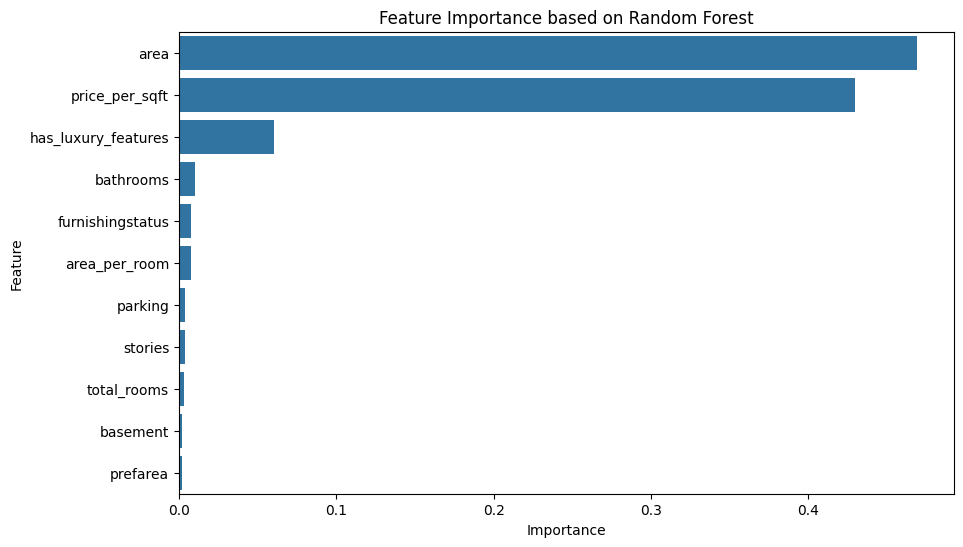

In [489]:
import pandas as pd

rf_model_for_importance = RandomForestRegressor(random_state=42)
rf_model_for_importance.fit(X_train, y_train)

feature_importances = rf_model_for_importance.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances (based on Random Forest):")
print(feature_importance_df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance based on Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

